# پیاده سازی استراتژی Momentum

## کتابخانه های مورد استفاده

In [1]:
from pandas_datareader import data
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from finta import TA    # FinTA (Financial Technical Analysis) url = https://pypi.org/project/finta/

## دریافت داده های سهام مورد نظر

In [23]:
symbol = ['AMZN'] 
source = 'yahoo'
start = dt.datetime(2007, 1, 1)
end = dt.datetime(2008, 2, 1)
connected = False
while not connected:
    try:
        ticker_df = data.DataReader(symbol,source, start=start, end=end)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

df = ticker_df.reset_index()
df=pd.DataFrame(df)
df.head()

connected to yahoo


Attributes,Date,Adj Close,Close,High,Low,Open,Volume
Symbols,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
0,2007-01-03,38.700001,38.700001,39.060001,38.049999,38.680000,12405100
1,2007-01-04,38.900002,38.900002,39.139999,38.259998,38.590000,6318400
2,2007-01-05,38.369999,38.369999,38.790001,37.599998,38.720001,6619700
3,2007-01-08,37.500000,37.500000,38.310001,37.169998,38.220001,6783000
4,2007-01-09,37.779999,37.779999,38.060001,37.340000,37.599998,5703000


In [28]:
dfs=df.drop(['Date','Adj Close','Volume'],axis=1)
dfs.columns=["open", "high", "low", "close"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


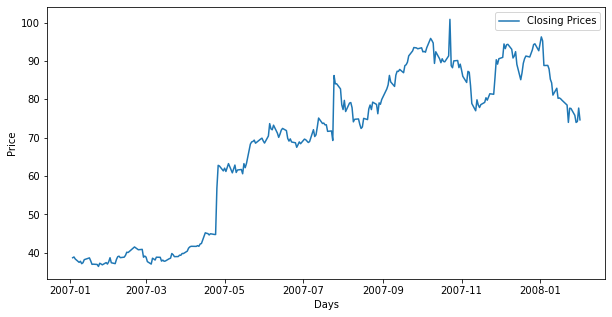

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.legend()
plt.show()

In [24]:
daily_returns = ticker_df['Adj Close'].pct_change()
monthly_returns = ticker_df['Adj Close'].resample('M').ffill().pct_change()

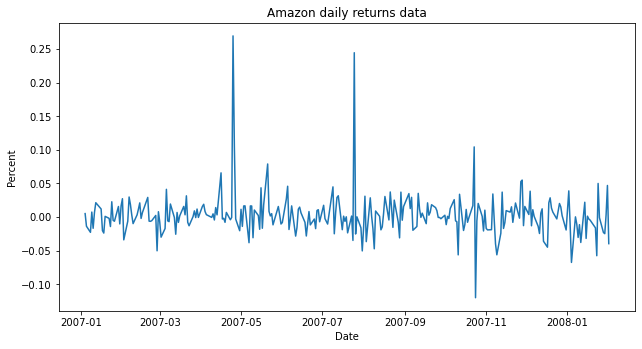

In [26]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Amazon daily returns data")
plt.show()

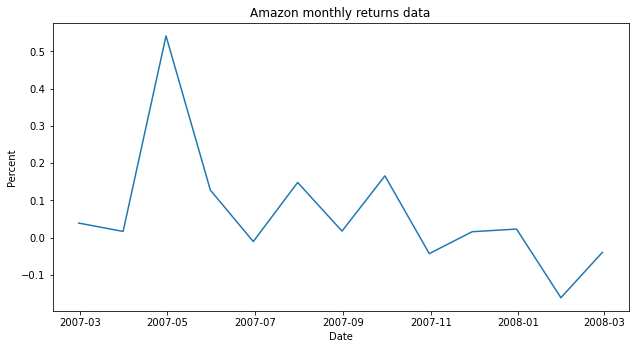

In [27]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Amazon monthly returns data")
plt.show()

## SMA (Simple Moving Average)

In [11]:
sma21=TA.SMA(dfs, 21) # period : 21
sma21=sma21.reset_index(drop=True)
sma21=pd.DataFrame(sma21)
sma21.columns=['sma21']

##############################################

sma9=TA.SMA(dfs, 9) # period : 9
sma9=sma9.reset_index(drop=True)
sma9=pd.DataFrame(sma9)
sma9.columns=['sma9']

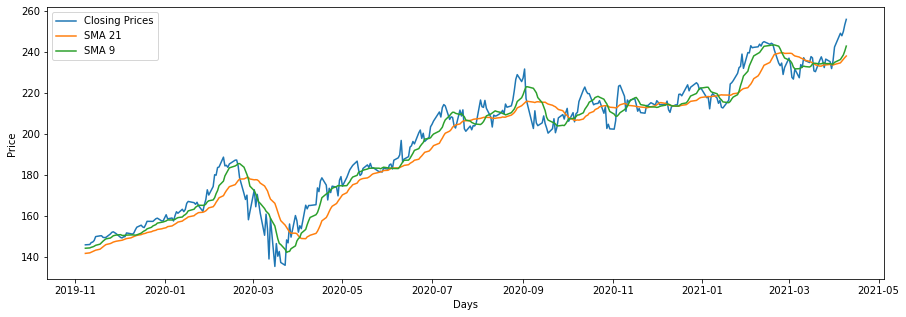

In [12]:
plt.figure(figsize=(15,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'].tail(356), df['Close'].tail(356), label='Closing Prices')
plt.plot(df['Date'].tail(356), sma21.tail(356), label='SMA 21')
plt.plot(df['Date'].tail(356), sma9.tail(356), label='SMA 9')
plt.legend()
plt.show()

## EMA (Exponential Moving Average)

In [13]:
ema9=TA.EMA(dfs,9) #period = 9
ema9=ema9.reset_index(drop=True)
ema9=pd.DataFrame(ema9)
ema9.columns=['ema9']

#############################

ema21=TA.EMA(dfs,21) #period = 21
ema21=ema21.reset_index(drop=True)
ema21=pd.DataFrame(ema21)
ema21.columns=['ema52']

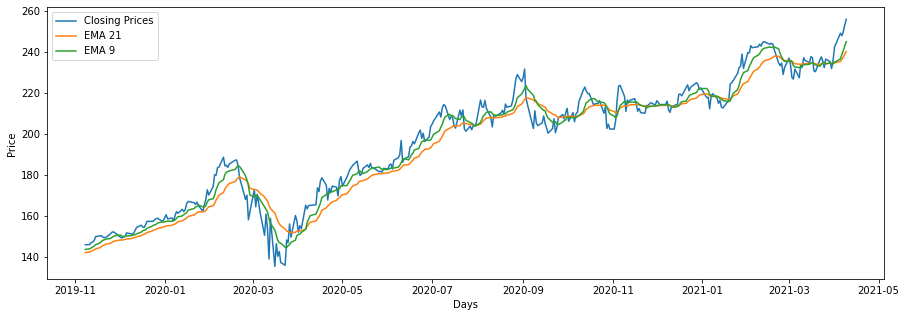

In [14]:
plt.figure(figsize=(15,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'].tail(356), df['Close'].tail(356), label='Closing Prices')
plt.plot(df['Date'].tail(356), ema21.tail(356), label='EMA 21')
plt.plot(df['Date'].tail(356), ema9.tail(356), label='EMA 9')
plt.legend()
plt.show()

## RSI (Relative Strenght Index)

In [15]:
rsi=TA.RSI(dfs,14)
rsi=rsi.reset_index(drop=True)
rsi=pd.DataFrame(rsi)
rsi.columns=['rsi']

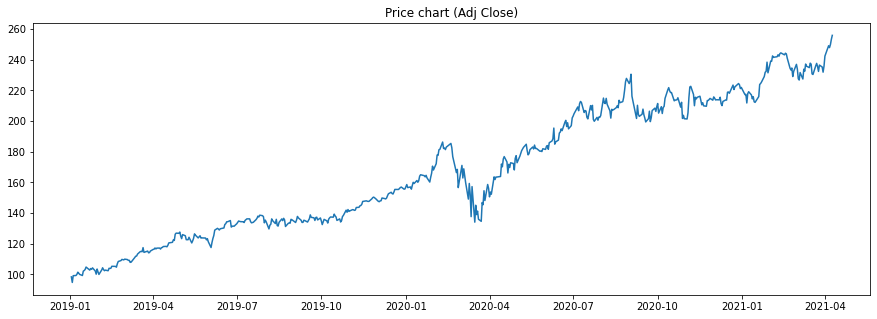

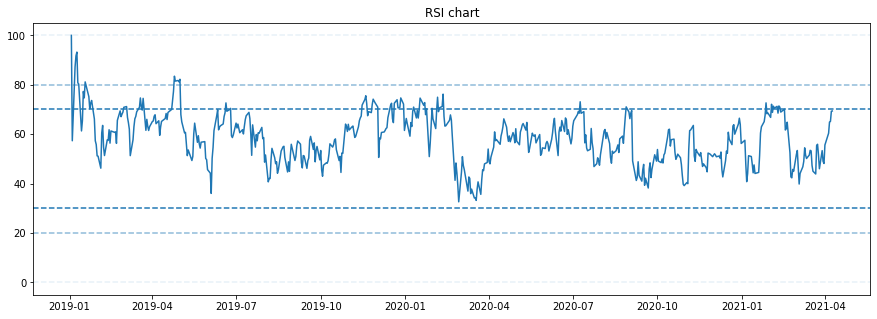

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close)')
plt.show()


plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], rsi['rsi'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

## ADX (Average Directional Index)

In [17]:
adx=TA.ADX(dfs,14)
adx=adx.reset_index(drop=True)
adx=pd.DataFrame(adx)
adx.columns=['adx']

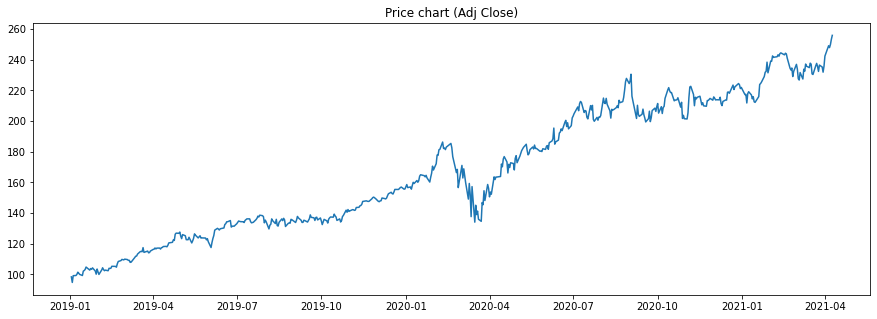

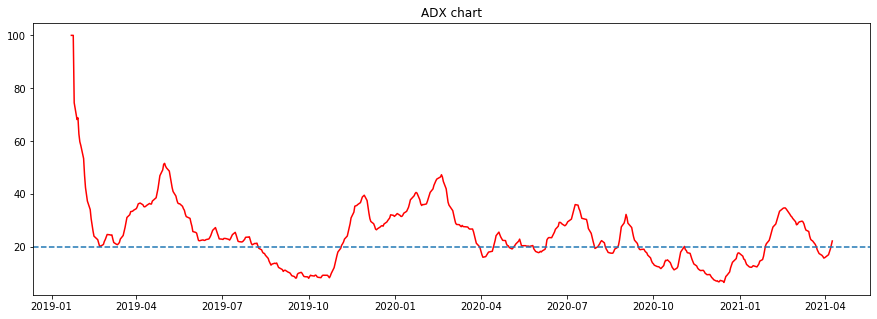

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close)')
plt.show()


plt.figure(figsize=(15,5))
plt.title('ADX chart')
plt.plot(df['Date'], adx['adx'],color='r')
plt.axhline(20, linestyle='--')

plt.show()


## Market Momentum

In [19]:
mom=TA.MOM(dfs,14)
mom=mom.reset_index(drop=True)
mom=pd.DataFrame(mom)
mom.columns=['mom']

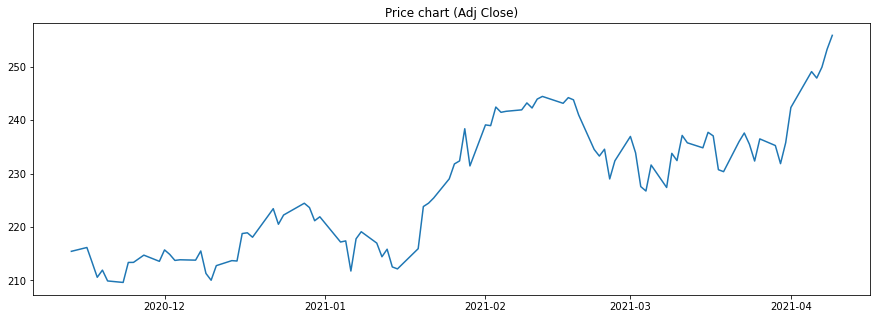

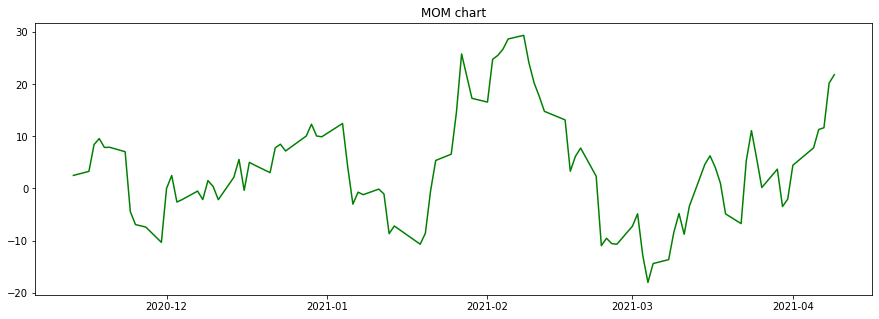

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'].tail(100), df['Adj Close'].tail(100))
plt.title('Price chart (Adj Close)')
plt.show()


plt.figure(figsize=(15,5))
plt.title('MOM chart')
plt.plot(df['Date'].tail(100), mom['mom'].tail(100),color='g')

plt.show()

## MACD (Moving Average Convergence Divergence)

In [21]:
macd=TA.MACD(dfs)
macd=macd.reset_index(drop=True)
macd=pd.DataFrame(macd)
macd.columns=['MACD','Signal']

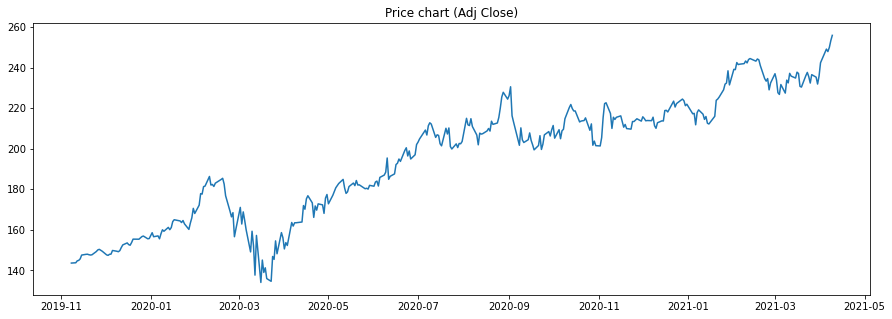

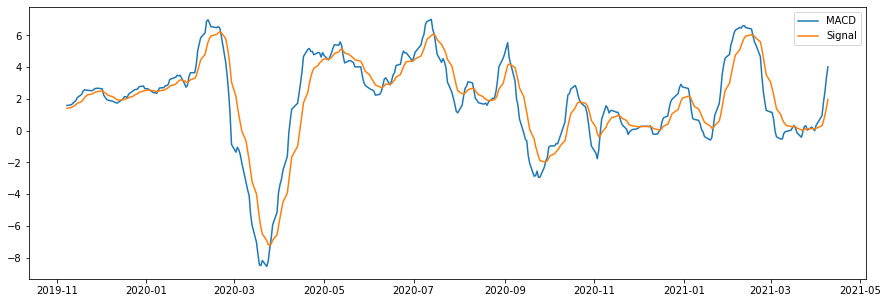

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'].tail(356), df['Adj Close'].tail(356))
plt.title('Price chart (Adj Close)')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df['Date'].tail(356), macd['MACD'].tail(356), label='MACD')
plt.plot(df['Date'].tail(356), macd['Signal'].tail(356), label='Signal')
plt.legend()
plt.show()


## Bollinger Bands

In [23]:
bb=TA.BBANDS(dfs)
bb=bb.reset_index(drop=True)
bb=pd.DataFrame(bb)
bb.columns=['BB_UPPER','BB_MIDDLE','BB_LOWER']

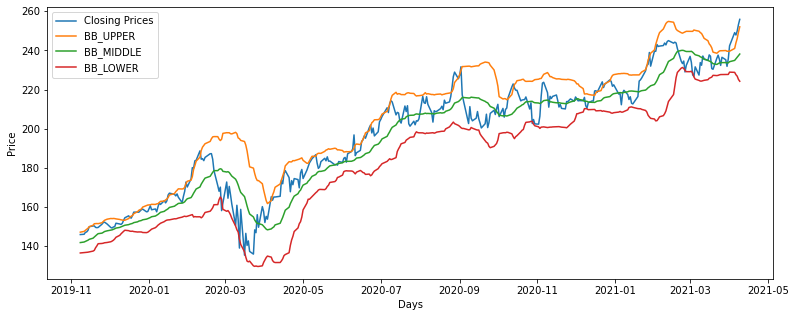

In [24]:
plt.figure(figsize=(13,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'].tail(356), df['Close'].tail(356), label='Closing Prices')
plt.plot(df['Date'].tail(356), bb['BB_UPPER'].tail(356), label='BB_UPPER')
plt.plot(df['Date'].tail(356), bb['BB_MIDDLE'].tail(356), label='BB_MIDDLE')
plt.plot(df['Date'].tail(356), bb['BB_LOWER'].tail(356), label='BB_LOWER')
plt.legend()
plt.show()

## جمع بندی

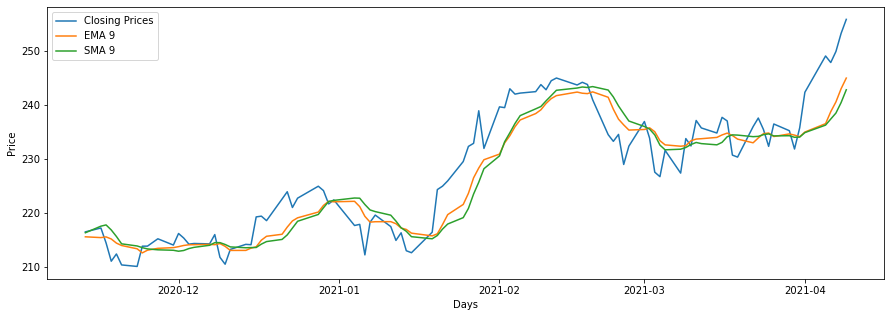

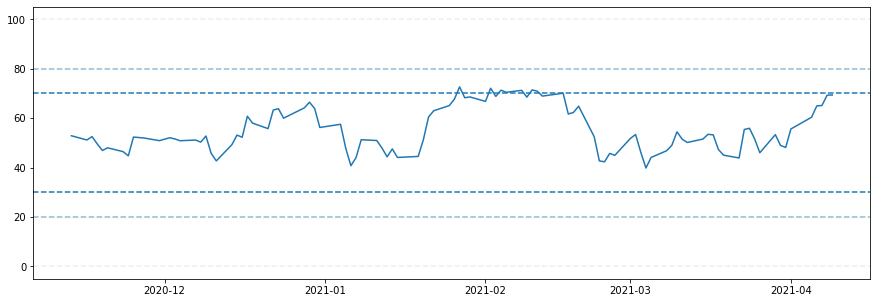

In [25]:
plt.figure(figsize=(15,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'].tail(100), df['Close'].tail(100), label='Closing Prices')
plt.plot(df['Date'].tail(100), ema9.tail(100), label='EMA 9')
plt.plot(df['Date'].tail(100), sma9.tail(100), label='SMA 9')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df['Date'].tail(100), rsi['rsi'].tail(100))

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

In [32]:
import plotly.graph_objects as go
import mplfinance as mpf

In [26]:
sa=TA.SAR(dfs)
sa=sa.reset_index(drop=True)
sa=pd.DataFrame(sa)
sa.columns=['sar']

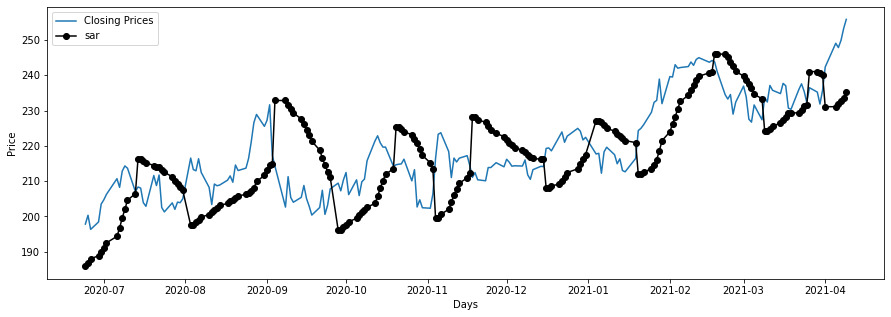

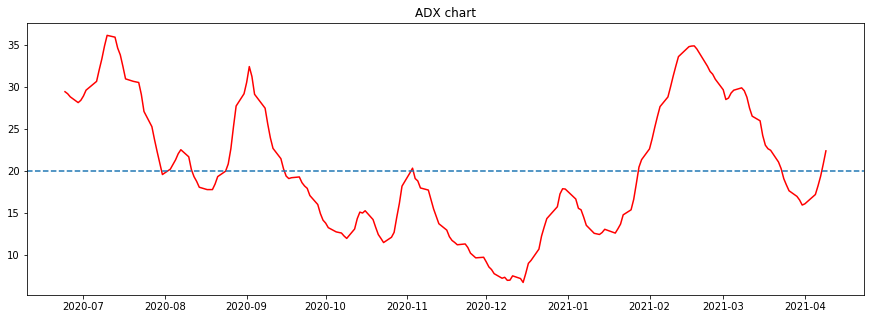

In [30]:
plt.figure(figsize=(15,5))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Date'].tail(200), df['Close'].tail(200), label='Closing Prices')
plt.plot(df['Date'].tail(200), sa['sar'].tail(200), label='sar',marker='o', color='black')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.title('ADX chart')
plt.plot(df['Date'].tail(200), adx['adx'].tail(200),color='r')
plt.axhline(20, linestyle='--')

plt.show()